# Exploratory Data Analysis on Ashrae Energy Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import time

In [2]:
%matplotlib inline

In [3]:
#change datapath here
# datapath='/Users/michaelsetyawan/Desktop/ANALYTICS/Python-References/Ashrae/data'
# datapath='/home/vincentl'
datapath= 'C:/Users/vincentlee/Desktop/datascienceprojects/Kaggle/ashrae'

# Read files related to train data

In [4]:
%pwd

'C:\\Users\\vincentlee\\Desktop\\datascienceprojects\\Kaggle\\ashrae'

In [5]:
train             = pd.read_csv(datapath+'/train.csv')
building_metadata = pd.read_csv(datapath+'/building_metadata.csv')
weather_train     = pd.read_csv(datapath+'/weather_train.csv')
test              = pd.read_csv(datapath+'/test.csv')
weather_test      = pd.read_csv(datapath+'/weather_test.csv')

In [5]:
completetrain = pd.read_csv(datapath+'/complete_train.csv')
completetest = pd.read_csv(datapath+'/complete_test.csv')

In [19]:
test.shape

(41697600, 4)

## Reduce memory

In [6]:
## Reducing memory
## Function to reduce the DF size
def reduce_memory(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
train               = reduce_memory(train)
weather_train       = reduce_memory(weather_train)
building_metadata   = reduce_memory(building_metadata)
test                = reduce_memory(test)
weather_test        = reduce_memory(weather_test)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)


In [8]:
completetrain = reduce_memory(completetrain)
completetest = reduce_memory(completetest)

Mem. usage decreased to 902.08 Mb (67.4% reduction)
Mem. usage decreased to 1860.08 Mb (67.4% reduction)


__EDA on Meter Reading__

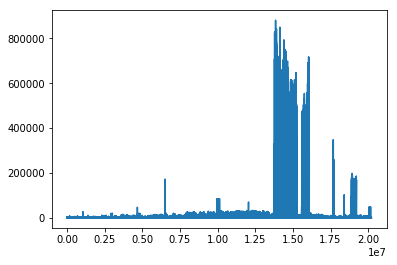

In [8]:
import matplotlib.pyplot as plt
plt.plot(train[train['meter'] == 1]['meter_reading'])
plt.show()

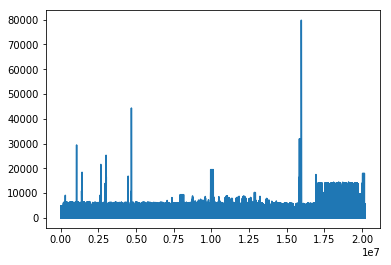

In [9]:
plt.plot(train[train['meter'] == 0]['meter_reading'])
plt.show()

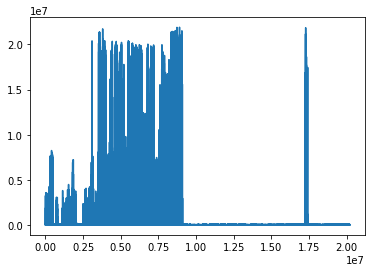

In [10]:
plt.plot(train[train['meter'] == 2]['meter_reading'])
plt.show()

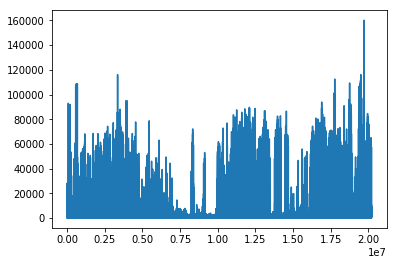

In [11]:
plt.plot(train[train['meter'] == 3]['meter_reading'])
plt.show()

__EDA on Weather__

In [13]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(weather_train[column].dropna(), color='red', ax=ax).set_title(column, fontsize=16)
    sns.distplot(weather_test[column].dropna(), color='blue', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()

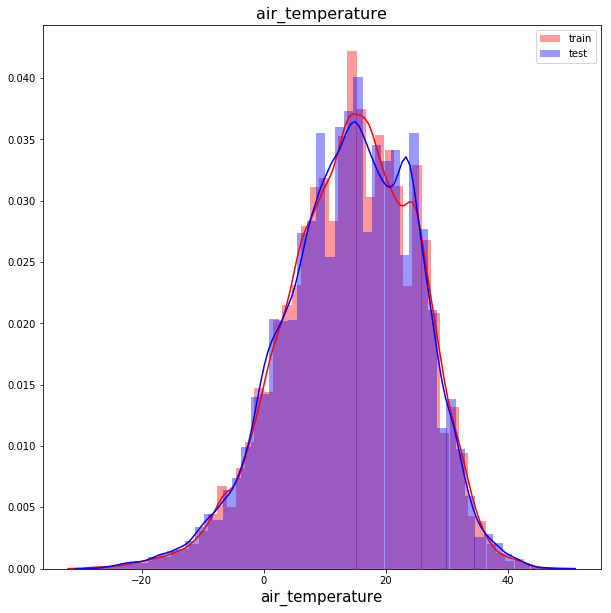

In [14]:
plot_dist_col('air_temperature')

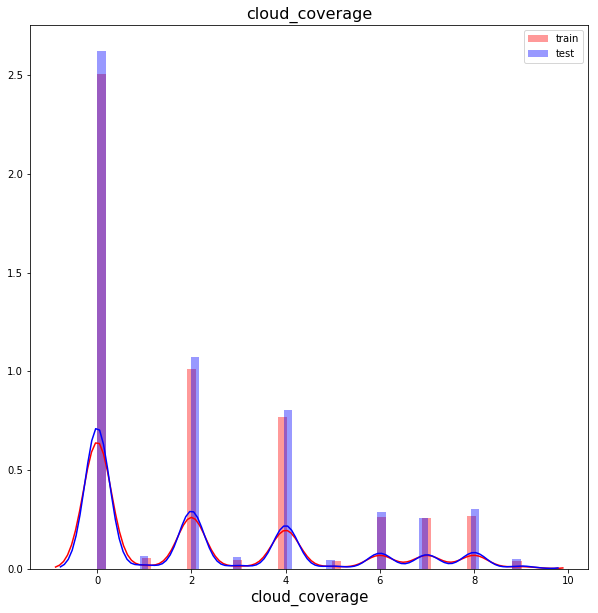

In [15]:
plot_dist_col('cloud_coverage')

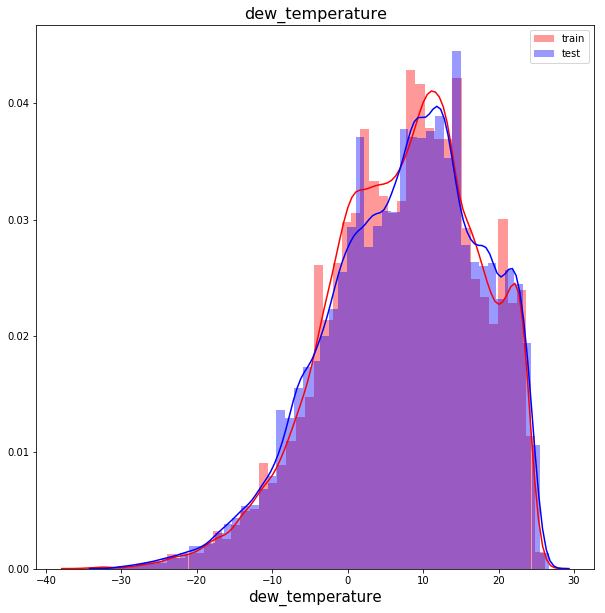

In [16]:
plot_dist_col('dew_temperature')

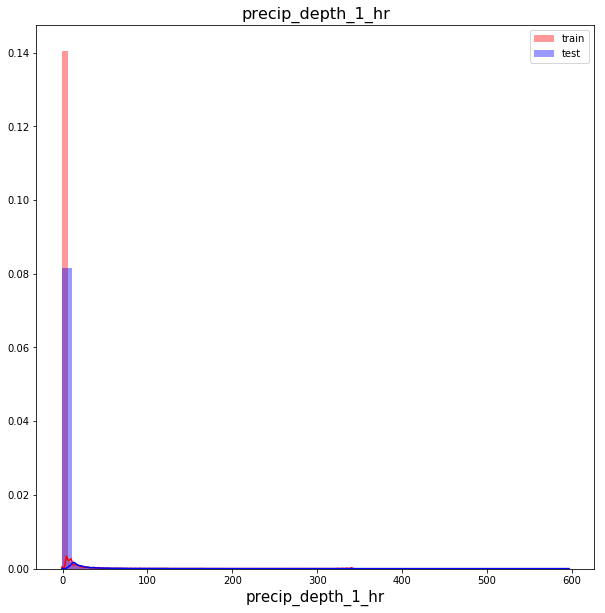

In [18]:
plot_dist_col('precip_depth_1_hr')

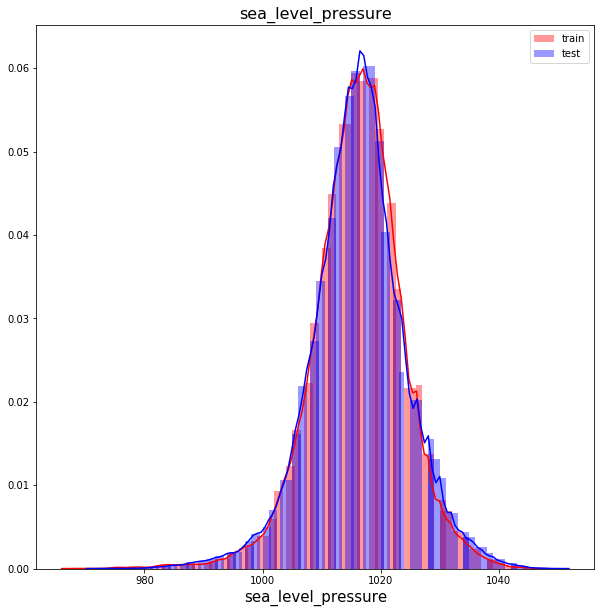

In [19]:
plot_dist_col('sea_level_pressure')

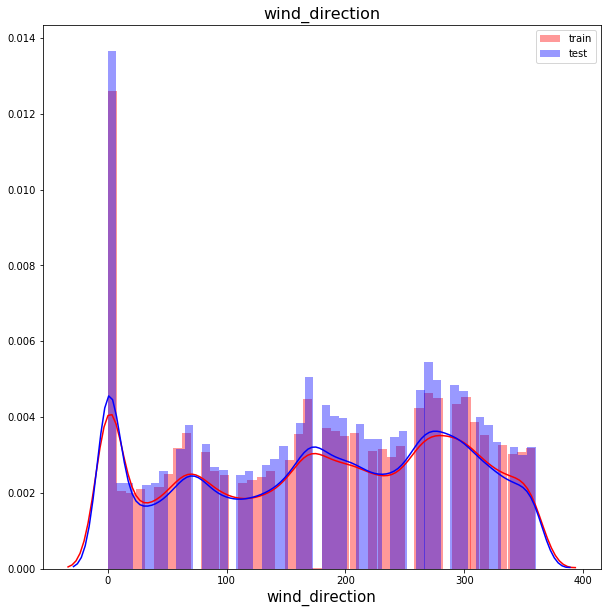

In [20]:
plot_dist_col('wind_direction')

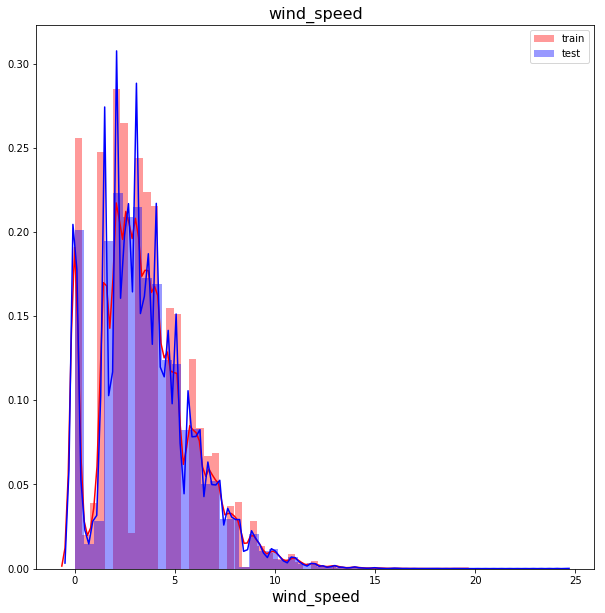

In [21]:
plot_dist_col('wind_speed')

__EDA on BUILDING__

In [28]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [27]:
count_value_building = building_metadata["primary_use"].value_counts()
trace = go.Bar(
    x=count_value_building.index,
    y=count_value_building.values,
    marker=dict(
        color="green",
    ),
)
layout = go.Layout(
    title=go.layout.Title(
        text="Building count by primary use",
        x=0.5),
    font=dict(size=14),
    width=800,
    height=400,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="meter")

In [31]:
count_value_building = building_metadata["floor_count"].value_counts()
trace = go.Bar(
    x=count_value_building.index,
    y=count_value_building.values,
    marker=dict(
        color="maroon",
    ),
)
layout = go.Layout(
    title=go.layout.Title(
        text="Building count by floor count",
        x=0.5
    ),
    font=dict(size=14),
    width=1000,
    height=500,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="meter")

In [34]:
count_value_building = building_metadata["year_built"].value_counts()
trace = go.Bar(
    x=count_value_building.index,
    y=count_value_building.values,
    marker=dict(
        color="darkviolet",
    ),
)
layout = go.Layout(
    title=go.layout.Title(
        text="Building count by year built",
        x=0.5
    ),
    font=dict(size=14),
    width=1000,
    height=500,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="meter")